In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import json
import glob
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
from collections import defaultdict
import tqdm 
from Bio.PDB import PDBParser
import warnings
import pickle
import dfs_code
from torch_geometric.datasets import TUDataset
import networkx as nx
warnings.filterwarnings('ignore')

In [2]:
path = "../datasets/TU/dd"

In [3]:
dataset = TUDataset(root=path, name="DD")

In [4]:
dataset[0]

Data(edge_index=[2, 1798], x=[327, 89], y=[1])

(array([691., 387.,  81.,   9.,   4.,   2.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  126.        ,  1417.27272727,  2708.54545455,  3999.81818182,
         5291.09090909,  6582.36363636,  7873.63636364,  9164.90909091,
        10456.18181818, 11747.45454545, 13038.72727273, 14330.        ,
        15621.27272727, 16912.54545455, 18203.81818182, 19495.09090909,
        20786.36363636, 22077.63636364, 23368.90909091, 24660.18181818,
        25951.45454545, 27242.72727273, 28534.        ]),
 <BarContainer object of 22 artists>)

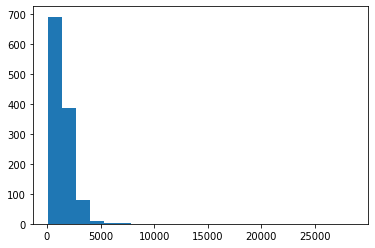

In [5]:
plt.hist([d.edge_index.shape[1] for d in dataset], bins="rice")

In [6]:
np.unique([d.x.sum(axis=1).max().item() for d in dataset])

array([1.])

In [ ]:
graphs = defaultdict(dict)
exceptions = []
for idx, data in tqdm.tqdm(enumerate(dataset)):
    edge_index = data.edge_index.numpy()
    edge_index_set = set((e[0], e[1]) for e in edge_index.T)
    edge_types = np.zeros(edge_index.shape[1], dtype=np.int32)
    glue_edges = []
    for i in range(len(data.x)-1):
        if (i, i+1) not in edge_index_set:
            glue_edges += [[i, i+1]]
        if (i+1, i) not in edge_index_set:
            glue_edges += [[i+1, i]]
    #for e in edge_index.T:
    #    if (e[1], e[0]) not in edge_index_set:
    #        glue_edges += [[e[1], e[0]]]
    
    if len(glue_edges) > 0:
        glue_edges = np.asarray(glue_edges).T
        edge_index = np.concatenate((edge_index, glue_edges), axis=1)
    
    g = nx.Graph()
    g.add_edges_from(edge_index.T)
    #nx.draw(g)
    #plt.show()
    print(len(list(nx.connected_components(g))))
    #edge_index_set = set((e[0], e[1]) for e in edge_index.T)
    #for e in edge_index.T:
    #    if (e[1],e[0]) not in edge_index_set or (e[0], e[1]) not in edge_index_set:
    #        print('directed protein graph')
    
    node_types = np.argmax(data.x.numpy(), axis=1)
    min_dfs_code, min_dfs_index = dfs_code.min_dfs_code_from_edgeindex(edge_index, 
                                                                       node_types.tolist(), 
                                                                       edge_types.tolist())
    
    graphs[idx]['edge_index'] = edge_index
    graphs[idx]['edge_types'] = edge_types
    graphs[idx]['node_types'] = node_types
    graphs[idx]['min_dfs_code'] = min_dfs_code
    graphs[idx]['min_dfs_index'] = min_dfs_index


0it [00:00, ?it/s]

1


3it [01:34, 21.94s/it]

1
1


5it [01:35,  9.82s/it]

In [ ]:
data.x.argmax(axis=1)

In [ ]:
for e in edge_index.T:
    print("[%d, %d],"%(e[0], e[1]), end=" ")

In [ ]:
with open(path+"min_dfs_codes.pkl"%(node_limit, cutoff), "wb") as f:
    pickle.dump(graphs, f)

In [ ]:
l = [[0, 1, 0, 0, 0, 122, 596, 123], [1, 2, 0, 0, 0, 123, 601, 124], [2, 0, 0, 0, 0, 124, 604, 122], [2, 3, 0, 0, 0, 124, 603, 121], [3, 0, 0, 0, 0, 121, 589, 122], [3, 1, 0, 0, 0, 121, 590, 123], [3, 4, 0, 0, 0, 121, 588, 120], [4, 0, 0, 0, 0, 120, 584, 122], [4, 5, 0, 0, 0, 120, 582, 119], [5, 0, 0, 0, 0, 119, 579, 122], [5, 3, 0, 0, 0, 119, 578, 121], [5, 6, 0, 0, 0, 119, 575, 117], [6, 7, 0, 0, 0, 117, 566, 118], [7, 5, 0, 0, 0, 118, 572, 119], [7, 8, 0, 0, 0, 118, 570, 116], [8, 6, 0, 0, 0, 116, 561, 117], [8, 9, 0, 0, 0, 116, 559, 114], [9, 10, 0, 0, 0, 114, 549, 113], [10, 8, 0, 0, 0, 113, 548, 116], [10, 11, 0, 0, 0, 113, 547, 115], [11, 8, 0, 0, 0, 115, 555, 116], [11, 9, 0, 0, 0, 115, 554, 114], [11, 12, 0, 0, 1, 115, 557, 278], [12, 8, 1, 0, 0, 278, 1352, 116], [12, 13, 1, 0, 1, 278, 1354, 279], [13, 8, 1, 0, 0, 279, 1356, 116], [13, 14, 1, 0, 1, 279, 1360, 287], [14, 6, 1, 0, 0, 287, 1398, 117], [14, 15, 1, 0, 1, 287, 1401, 286], [15, 6, 1, 0, 0, 286, 1393, 117], [15, 7, 1, 0, 0, 286, 1394, 118], [15, 16, 1, 0, 1, 286, 1397, 290], [16, 7, 1, 0, 0, 290, 1409, 118], [16, 17, 1, 0, 1, 290, 1410, 285], [17, 5, 1, 0, 0, 285, 1388, 119], [17, 18, 1, 0, 1, 285, 1389, 280], [18, 4, 1, 0, 0, 280, 1362, 120], [18, 5, 1, 0, 0, 280, 1361, 119], [18, 19, 1, 0, 1, 280, 1364, 282], [19, 0, 1, 0, 0, 282, 1372, 122], [19, 1, 1, 0, 0, 282, 1373, 123], [19, 20, 1, 0, 1, 282, 1377, 283], [20, 2, 1, 0, 0, 283, 1378, 124], [20, 21, 1, 0, 0, 283, 1379, 125], [21, 2, 0, 0, 0, 125, 608, 124], [21, 22, 0, 0, 0, 125, 610, 127], [22, 23, 0, 0, 0, 127, 617, 126], [23, 21, 0, 0, 0, 126, 612, 125], [23, 24, 0, 0, 0, 126, 614, 128], [24, 22, 0, 0, 0, 128, 622, 127], [24, 25, 0, 0, 0, 128, 623, 129], [25, 22, 0, 0, 0, 129, 625, 127], [25, 26, 0, 0, 0, 129, 627, 130], [26, 24, 0, 0, 0, 130, 628, 128], [26, 27, 0, 0, 0, 130, 631, 132], [27, 28, 0, 0, 0, 132, 641, 133], [28, 26, 0, 0, 0, 133, 644, 130], [28, 29, 0, 0, 0, 133, 645, 131], [29, 26, 0, 0, 0, 131, 634, 130], [29, 27, 0, 0, 0, 131, 635, 132], [29, 30, 0, 0, 1, 131, 637, 293], [30, 26, 1, 0, 0, 293, 1421, 130], [30, 31, 1, 0, 1, 293, 1423, 276], [31, 19, 1, 0, 1, 276, 1343, 282], [31, 20, 1, 0, 1, 276, 1344, 283], [31, 22, 1, 0, 0, 276, 1342, 127], [31, 23, 1, 0, 0, 276, 1341, 126], [30, 32, 1, 0, 1, 293, 1425, 295], [32, 27, 1, 0, 0, 295, 1432, 132], [32, 28, 1, 0, 0, 295, 1433, 133], [32, 33, 1, 0, 1, 295, 1437, 294], [33, 27, 1, 0, 0, 294, 1427, 132], [33, 29, 1, 0, 0, 294, 1426, 131], [33, 30, 1, 0, 1, 294, 1430, 293], [33, 34, 1, 0, 1, 294, 1429, 292], [34, 28, 1, 0, 0, 292, 1417, 133], [34, 32, 1, 0, 1, 292, 1420, 295], [34, 35, 1, 0, 1, 292, 1418, 291], [35, 32, 1, 0, 1, 291, 1416, 295], [35, 33, 1, 0, 1, 291, 1415, 294], [20, 36, 1, 0, 1, 283, 1381, 281], [36, 3, 1, 0, 0, 281, 1368, 121], [36, 4, 1, 0, 0, 281, 1367, 120], [36, 18, 1, 0, 1, 281, 1369, 280], [36, 19, 1, 0, 1, 281, 1370, 282], [18, 37, 1, 0, 1, 280, 1366, 288], [37, 16, 1, 0, 1, 288, 1405, 290], [37, 17, 1, 0, 1, 288, 1403, 285], [37, 38, 1, 0, 1, 288, 1404, 289], [38, 16, 1, 0, 1, 289, 1408, 290], [38, 17, 1, 0, 1, 289, 1406, 285], [15, 39, 1, 0, 1, 286, 1395, 284], [39, 12, 1, 0, 1, 284, 1384, 278], [39, 13, 1, 0, 1, 284, 1385, 279], [39, 14, 1, 0, 1, 284, 1387, 287], [39, 40, 1, 0, 1, 284, 1383, 277], [40, 9, 1, 0, 0, 277, 1346, 114], [40, 11, 1, 0, 0, 277, 1347, 115], [40, 12, 1, 0, 1, 277, 1348, 278], [40, 13, 1, 0, 1, 277, 1349, 279]]
d = {122: 0, 123: 1, 124: 2, 121: 3, 120: 4, 119: 5, 117: 6, 118: 7, 116: 8, 114: 9, 113: 10, 115: 11, 278: 12, 279: 13, 287: 14, 286: 15, 290: 16, 285: 17, 280: 18, 282: 19, 283: 20, 125: 21, 127: 22, 126: 23, 128: 24, 129: 25, 130: 26, 132: 27, 133: 28, 131: 29, 293: 30, 276: 31, 295: 32, 294: 33, 292: 34, 291: 35, 281: 36, 288: 37, 289: 38, 284: 39, 277: 40}

In [ ]:
len(d)

In [ ]:
len(l)